In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_np, dtype = torch.float)
x_ones

tensor([[1., 1.],
        [1., 1.]])

In [5]:
shape = (3,2,)
rand_tensor = torch.rand(shape)
zeros_tensor = torch.zeros(shape)

In [6]:
print(rand_tensor)

tensor([[0.0621, 0.3404],
        [0.2394, 0.5272],
        [0.0461, 0.3884]])


In [7]:
print(zeros_tensor)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [8]:
rand_tensor.shape

torch.Size([3, 2])

In [9]:
rand_tensor.dtype

torch.float32

In [10]:
new_zeros = torch.zeros_like(zeros_tensor, dtype = rand_tensor.dtype)
new_zeros

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [14]:
tensor = torch.rand(3,4)
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [15]:
rand_tensor

tensor([[0.0621, 0.3404],
        [0.2394, 0.5272],
        [0.0461, 0.3884]])

In [16]:
rand_tensor[0]

tensor([0.0621, 0.3404])

In [17]:
rand_tensor[:, 0]

tensor([0.0621, 0.2394, 0.0461])

In [18]:
rand_tensor[:, -1]

tensor([0.3404, 0.5272, 0.3884])

In [19]:
zeros_tensor.shape

torch.Size([3, 2])

In [20]:
ones_tensor = torch.ones_like(zeros_tensor)
ones_tensor.shape

torch.Size([3, 2])

In [21]:
torch.stack((ones_tensor, zeros_tensor), dim = -1)

tensor([[[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]]])

In [22]:
torch.stack((ones_tensor, zeros_tensor), dim = 0)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [23]:
torch.stack((ones_tensor, zeros_tensor), dim = 1)

tensor([[[1., 1.],
         [0., 0.]],

        [[1., 1.],
         [0., 0.]],

        [[1., 1.],
         [0., 0.]]])

In [24]:
rand_tensor @ rand_tensor.T

tensor([[0.1197, 0.1943, 0.1351],
        [0.1943, 0.3352, 0.2158],
        [0.1351, 0.2158, 0.1530]])

In [25]:
rand_tensor * rand_tensor

tensor([[0.0039, 0.1159],
        [0.0573, 0.2779],
        [0.0021, 0.1508]])

In [26]:
tensor = torch.ones((3,3))
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [27]:
tensor % 90

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [28]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [29]:
class PermuteTransform:
  def __call__(self, tensor):
    return tensor.permute(1,2,0)

In [30]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.Lambda(lambda x:x.convert("RGB")),
    transforms.ToTensor(),
    PermuteTransform(),
])

In [31]:
training_data = datasets.Caltech101(
    root = "data",
    # train = True,
    download = True,
    transform = transform,
)

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=59b7ea82-d1c2-42f7-b372-9f2210a0564d
To: /content/data/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:01<00:00, 75.3MB/s]


Extracting data/caltech101/101_ObjectCategories.tar.gz to data/caltech101


Downloading...
From (original): https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
From (redirected): https://drive.usercontent.google.com/download?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m&confirm=t&uuid=19875450-200a-4d67-8927-20eb12476f55
To: /content/data/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 27.5MB/s]


Extracting data/caltech101/Annotations.tar to data/caltech101


In [57]:
test_data = datasets.Caltech101(
    root = "data",
    # train = False,
    download = True,
    transform = transform,
)

Files already downloaded and verified


In [58]:
print(len(training_data))
print(len(test_data))

8677
8677


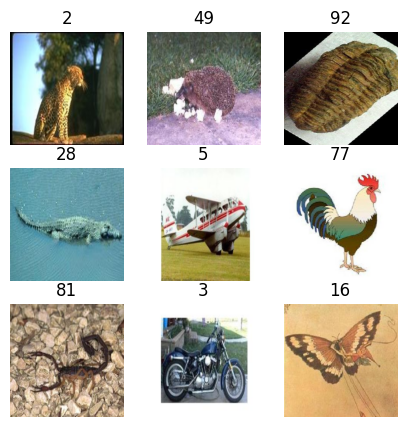

In [59]:
figure = plt.figure(figsize = (5,5))
cols, rows = 3,3
for i in range(1, cols*rows + 1):
  sample_ind = torch.randint(len(training_data), size = (1,)).item()
  img, label = training_data[sample_ind]
  # img = img.permute(1,2,0)
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img)
plt.show()

In [60]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 32, shuffle = False)

torch.Size([32, 300, 300, 3])
torch.Size([32])


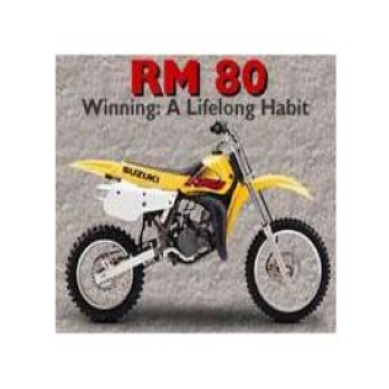

tensor(3)


In [61]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size())
print(train_labels.size())

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()
print(label)

In [62]:
unique_classes = set(label for _, label in training_data)
print(len(unique_classes))

101


In [63]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [64]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [65]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(3*300*300, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 101),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [66]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [67]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=270000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=101, bias=True)
  )
)


In [68]:
print(device)

cuda


In [69]:
X = torch.rand(1, 3*300, 300, device = device)
logits = model(X)
pred_prob = nn.Softmax(dim = 1)(logits)
y_pred = pred_prob.argmax(1)
print(y_pred)

tensor([66], device='cuda:0')


In [70]:
batch_size = 32
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if batch % 100 ==0:
      loss, current = loss.item(), batch * batch_size + len(X)
      print(f"loss : {loss:>7f} [{current:>5d} / {size :>5d}]")

In [71]:
def test_loop(dataloader, model, loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [72]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epochs = 10
for t in range(epochs):
  print(f"Epoch : {t+1}\n")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print('Done')

Epoch : 1

loss : 4.619750 [   32 /  8677]
loss : 4.589582 [ 3232 /  8677]
loss : 4.318093 [ 6432 /  8677]
Test Error: 
 Accuracy: 9.2%, Avg loss: 4.275214 

Epoch : 2

loss : 4.304011 [   32 /  8677]
loss : 4.333206 [ 3232 /  8677]
loss : 3.962492 [ 6432 /  8677]
Test Error: 
 Accuracy: 12.0%, Avg loss: 4.133249 

Epoch : 3

loss : 3.921150 [   32 /  8677]
loss : 4.529253 [ 3232 /  8677]
loss : 4.054316 [ 6432 /  8677]
Test Error: 
 Accuracy: 15.5%, Avg loss: 4.043264 

Epoch : 4

loss : 3.949163 [   32 /  8677]
loss : 4.321160 [ 3232 /  8677]
loss : 3.453844 [ 6432 /  8677]
Test Error: 
 Accuracy: 19.8%, Avg loss: 3.939271 

Epoch : 5

loss : 3.485158 [   32 /  8677]
loss : 3.937251 [ 3232 /  8677]
loss : 3.747944 [ 6432 /  8677]
Test Error: 
 Accuracy: 20.3%, Avg loss: 3.844273 

Epoch : 6

loss : 3.845681 [   32 /  8677]
loss : 3.333375 [ 3232 /  8677]
loss : 3.495597 [ 6432 /  8677]
Test Error: 
 Accuracy: 22.6%, Avg loss: 3.745315 

Epoch : 7

loss : 3.557825 [   32 /  8677]
loss

In [73]:
import torch
import torchvision.models as models
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=270000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=101, bias=True)
  )
)

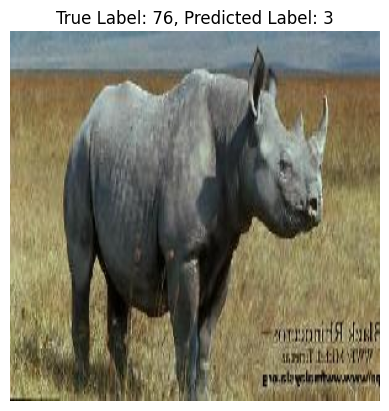

In [80]:
import random
random_index = random.randint(0, len(test_data) - 1)
image, true_label = test_data[random_index]
image = image.unsqueeze(0).to(device)
with torch.no_grad():
  logits = model(image)
  pred_prob = nn.Softmax(dim = 1)(logits)
  predicted_label = pred_prob.argmax(1).item()
image = image.squeeze().cpu()
# image = image.permute(1, 2, 0)
plt.imshow(image)
plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()